# Labels
- Throw away some of the atoms
        - For example H atoms in RCOMe
    
- Treat some atoms as R
        - For example the two C atoms in ArCI
        
First, plot the first fragments and their labels.      


In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
central_groups = ["RCOMe", "RNO2", "ArCI", "NO3", "RC6F5", "H2O", "RC6H5"]
contact_groups = ["ArCH", "C2CH2", "CCH3", "CF", "R2CO", "RC6H5", "RCN", "XH", "XH"]
to_count =       ["H",    "H",      "H",   "F", "O",     "centroid", "N", "H", "O"]

In [19]:
def plot_fragment_with_labels(central_group, contact_group):
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]
        
    print(labels, '\n', atoms)

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        dictionary[information[0]] = [x,y,z]

        line = fp.readline()
        
        if "**FRAG**" in line:
            firstfragment = False

    fp.close()

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
        
        if 'H' in atom:
            color = 'grey'
            label = 'H'
        elif 'O' in atom:
            color='red'
            label = 'O'
        elif 'F' in atom:
            color='orchid'
            label = 'F'
        elif 'N' in atom:
            color='blue'
            label = 'N'
        else:
            color = 'black'
            label ='C'

        ax.scatter(x,y,z, color=color)

        ax.text(x+0.01, y+0.01, z+0.01, labels[i])

        
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.axis('off')
#     ax.set_xlabel('X axis')
#     ax.set_ylabel('Y axis')
#     ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7'] 
 ['O1', 'C2', 'C3', 'O4', 'H25', 'H24', 'H23']


<IPython.core.display.Javascript object>


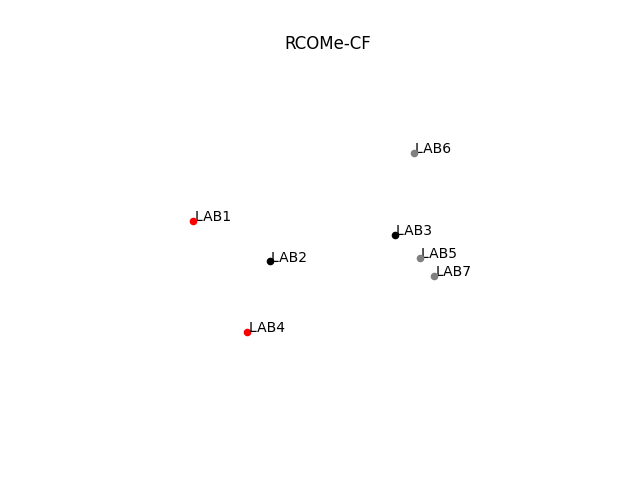

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4'] 
 ['O1', 'N7', 'O2', 'O3']


<IPython.core.display.Javascript object>


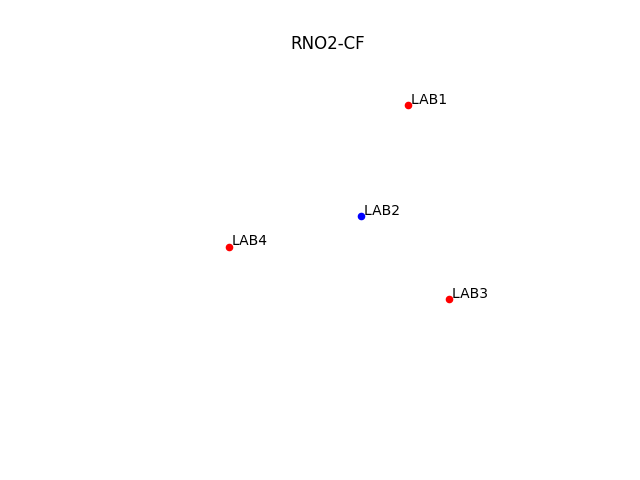

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C19', 'C24', 'C23', 'C22', 'C21', 'C20', 'I1', 'H5', 'H4', 'H3', 'H2', 'H1']


<IPython.core.display.Javascript object>


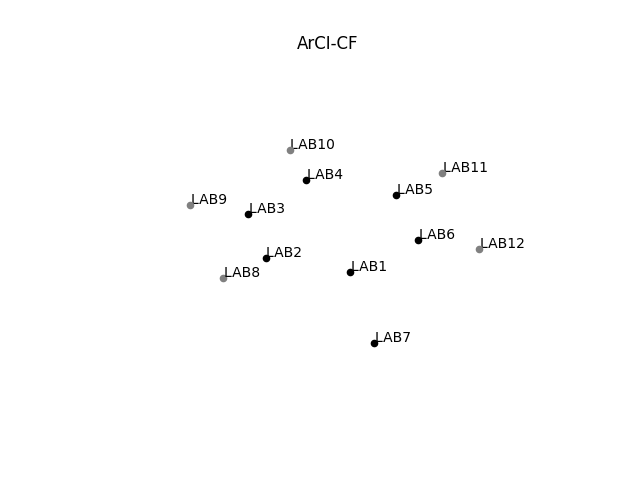

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O1', 'N7', 'O2', 'O3']


<IPython.core.display.Javascript object>


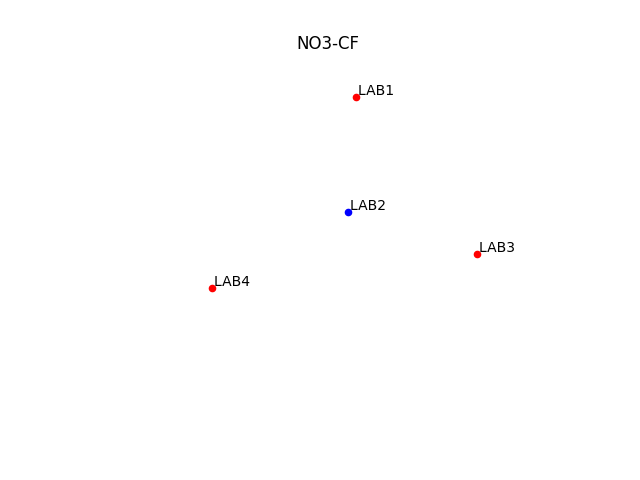

['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C1D', 'C2', 'C1E', 'C1', 'C1A', 'C2D', 'F2D', 'F1E', 'F1D', 'F1A', 'F2', 'F1']


<IPython.core.display.Javascript object>


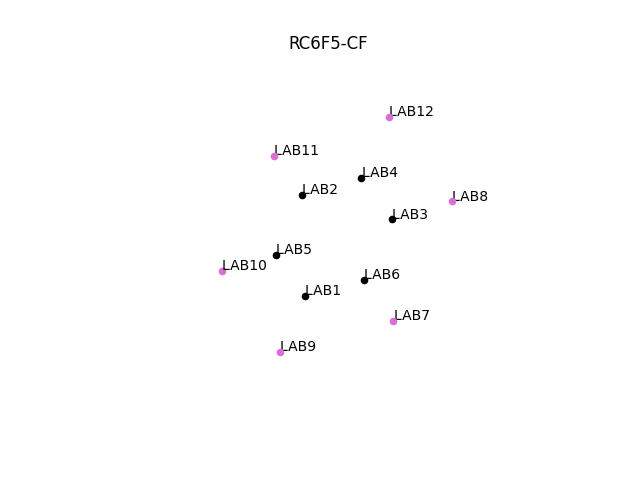

['LAB1  ', 'LAB2  ', 'LAB3  '] 
 ['H45', 'O15', 'H46']


<IPython.core.display.Javascript object>


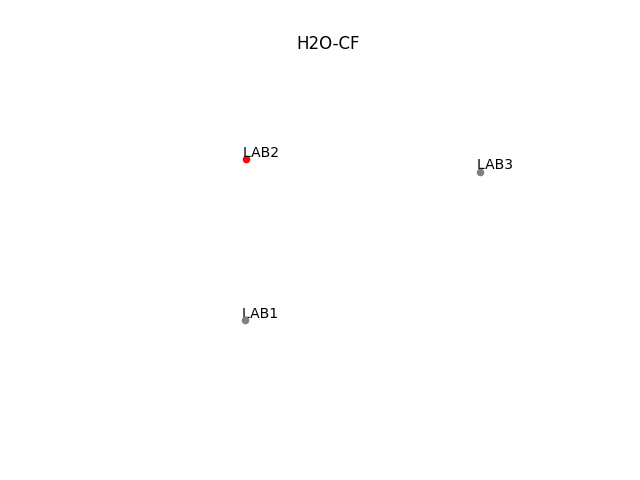

['LAB10', 'LAB5', 'LAB6', 'LAB11', 'LAB4', 'LAB9', 'LAB3', 'LAB8', 'LAB2', 'LAB7', 'LAB12', 'LAB1'] 
 ['H9', 'C10', 'C11', 'H10', 'C9', 'H8', 'C8', 'H7', 'C7', 'C12', 'H11', 'C1']


<IPython.core.display.Javascript object>


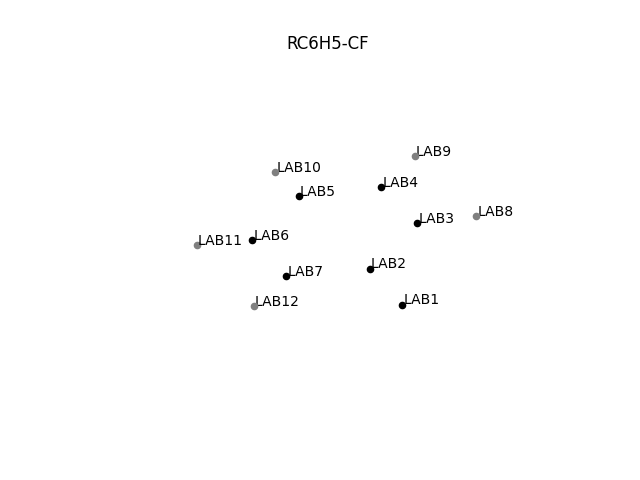

In [20]:
for central_group in central_groups:
    if central_group == "RC6H5" and contact_group == "RC6H5" or central_group == "RC6H5" and contact_group == "ArCH":
        continue

    plot_fragment_with_labels(central_group, "CF")

### Now plot the things as how the "user" has defined them
In reality, this is still a script, but it could be implemented in a GUI.

In [22]:
definitions = pd.read_csv('../data/central_groups.csv')
display(definitions)

,name,center_label,y_axis_label,xy_plane_label,not_R,R,bin
0,ArCI,LAB7,LAB1,LAB2,LAB1-LAB7,LAB2-LAB6,LAB3-LAB4-LAB5-LAB8-LAB9-LAB10-LAB11-LAB12
1,NO3,LAB1,LAB2,LAB3,LAB1-LAB2-LAB3-LAB4,-,-
2,H2O,LAB3,LAB2,LAB1,LAB1-LAB2-LAB3,-,-
3,RCOMe,LAB1,LAB2,LAB3,LAB1-LAB2-LAB3,LAB4,LAB5-LAB6-LAB7
4,RC6H5,LAB2,LAB4,LAB6,LAB2-LAB3-LAB4-LAB5-LAB6-LAB7-LAB8-LAB9-LAB10-...,LAB1,-
5,RC6F5,LAB1,LAB2,LAB3,LAB1-LAB2-LAB3-LAB4-LAB5-LAB6-LAB7-LAB8-LAB9-L...,LAB12,-
6,RNO2,LAB1,LAB2,LAB3,LAB2-LAB3-LAB4,LAB1,-


In [52]:
def plot_fragment_with_user_labels(central_group, contact_group, definitions):
    row = definitions.loc[definitions.name == central_group]
    print(row)
    
    datafile = "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  "..\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]
        
    print(labels, '\n', atoms)

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        dictionary[information[0]] = [x,y,z]

        line = fp.readline()
        
        if "**FRAG**" in line:
            firstfragment = False

    fp.close()

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]
                
        if labels[i].strip() in row.bin.item().split('-'):
            ax.scatter(x,y,z, color='grey', marker='x')
        elif labels[i].strip() in row.R.item().split('-'):
            ax.scatter(x,y,z, color='lightgreen', marker='o')
        else:
            ax.scatter(x,y,z, color='blue')
            
        ax.text(x+0.01, y+0.01, z+0.01, labels[i])

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()

    name center_label y_axis_label xy_plane_label           not_R     R  \
3  RCOMe         LAB1         LAB2           LAB3  LAB1-LAB2-LAB3  LAB4   

              bin  
3  LAB5-LAB6-LAB7  
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7'] 
 ['O1', 'C2', 'C3', 'O4', 'H25', 'H24', 'H23']


<IPython.core.display.Javascript object>


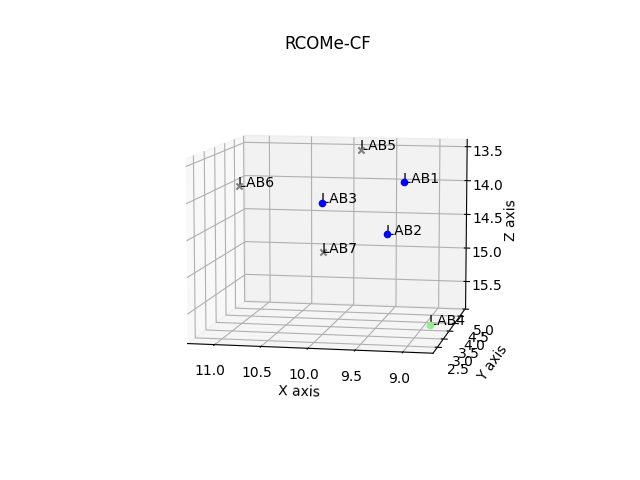

   name center_label y_axis_label xy_plane_label           not_R     R bin
6  RNO2         LAB1         LAB2           LAB3  LAB2-LAB3-LAB4  LAB1   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4'] 
 ['O1', 'N7', 'O2', 'O3']


<IPython.core.display.Javascript object>


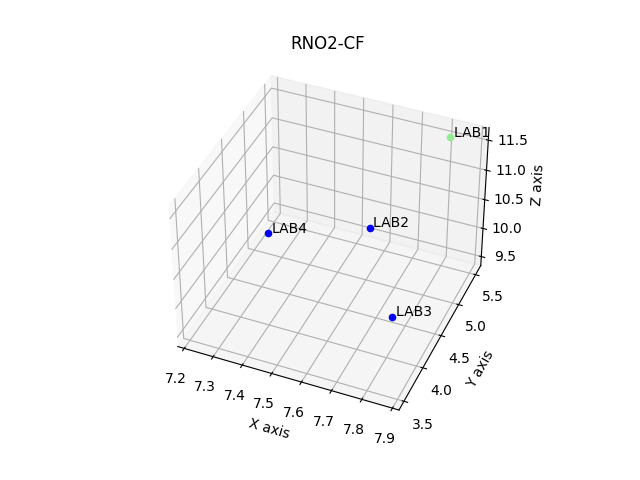

   name center_label y_axis_label xy_plane_label      not_R          R  \
0  ArCI         LAB7         LAB1           LAB2  LAB1-LAB7  LAB2-LAB6   

                                          bin  
0  LAB3-LAB4-LAB5-LAB8-LAB9-LAB10-LAB11-LAB12  
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C19', 'C24', 'C23', 'C22', 'C21', 'C20', 'I1', 'H5', 'H4', 'H3', 'H2', 'H1']


<IPython.core.display.Javascript object>


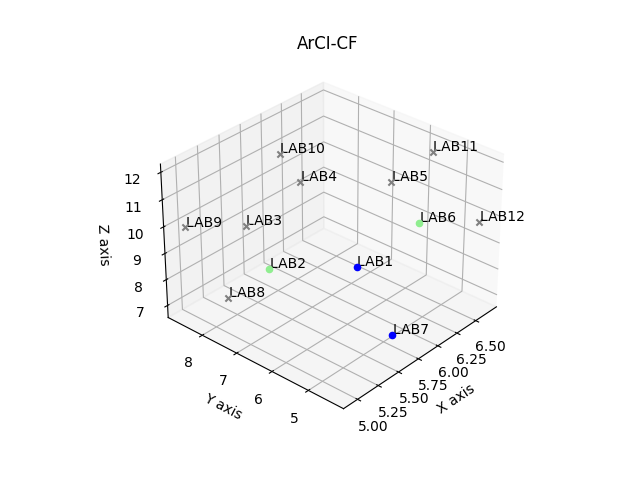

  name center_label y_axis_label xy_plane_label                not_R  R bin
1  NO3         LAB1         LAB2           LAB3  LAB1-LAB2-LAB3-LAB4  -   -
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  '] 
 ['O1', 'N7', 'O2', 'O3']


<IPython.core.display.Javascript object>


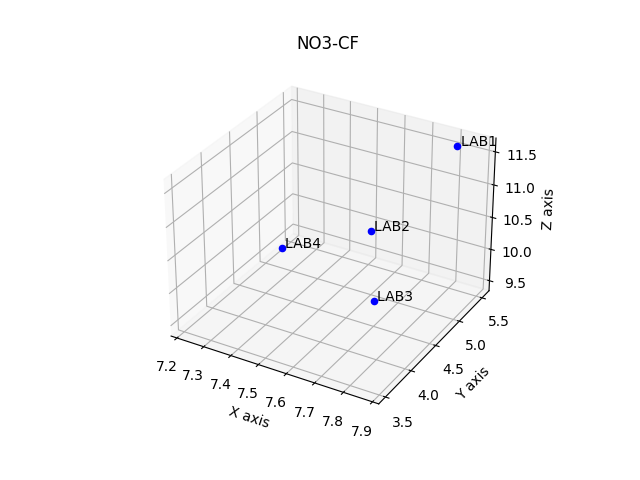

    name center_label y_axis_label xy_plane_label  \
5  RC6F5         LAB1         LAB2           LAB3   

                                               not_R      R bin  
5  LAB1-LAB2-LAB3-LAB4-LAB5-LAB6-LAB7-LAB8-LAB9-L...  LAB12   -  
['LAB1  ', 'LAB2  ', 'LAB3  ', 'LAB4  ', 'LAB5  ', 'LAB6  ', 'LAB7  ', 'LAB8  ', 'LAB9  ', 'LAB10 ', 'LAB11 ', 'LAB12 '] 
 ['C1D', 'C2', 'C1E', 'C1', 'C1A', 'C2D', 'F2D', 'F1E', 'F1D', 'F1A', 'F2', 'F1']


<IPython.core.display.Javascript object>


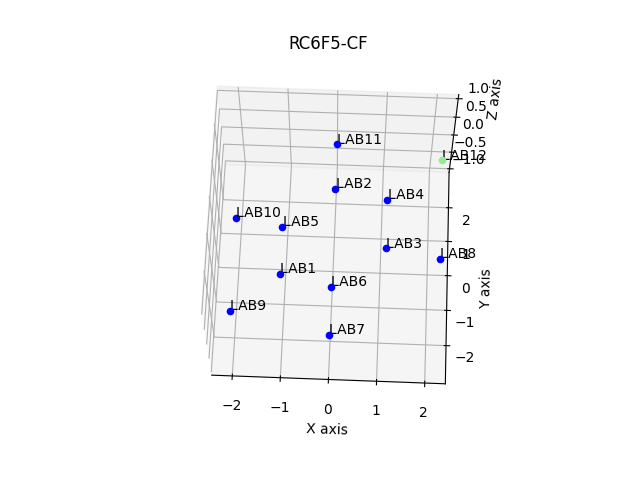

  name center_label y_axis_label xy_plane_label           not_R  R bin
2  H2O         LAB3         LAB2           LAB1  LAB1-LAB2-LAB3  -   -
['LAB1  ', 'LAB2  ', 'LAB3  '] 
 ['H45', 'O15', 'H46']


<IPython.core.display.Javascript object>


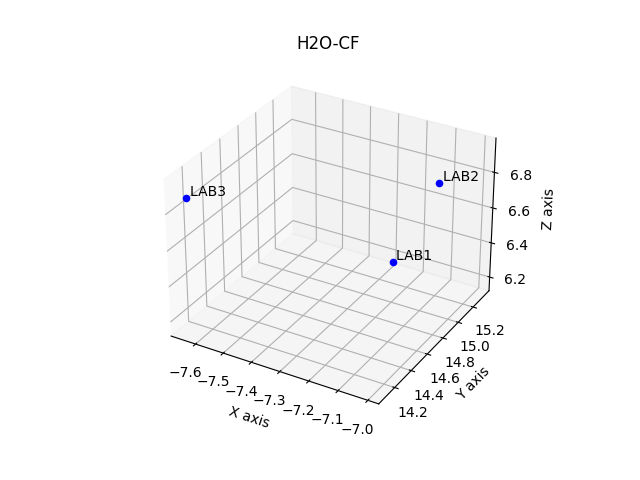

    name center_label y_axis_label xy_plane_label  \
4  RC6H5         LAB2         LAB4           LAB6   

                                               not_R     R bin  
4  LAB2-LAB3-LAB4-LAB5-LAB6-LAB7-LAB8-LAB9-LAB10-...  LAB1   -  
['LAB10', 'LAB5', 'LAB6', 'LAB11', 'LAB4', 'LAB9', 'LAB3', 'LAB8', 'LAB2', 'LAB7', 'LAB12', 'LAB1'] 
 ['H9', 'C10', 'C11', 'H10', 'C9', 'H8', 'C8', 'H7', 'C7', 'C12', 'H11', 'C1']


<IPython.core.display.Javascript object>


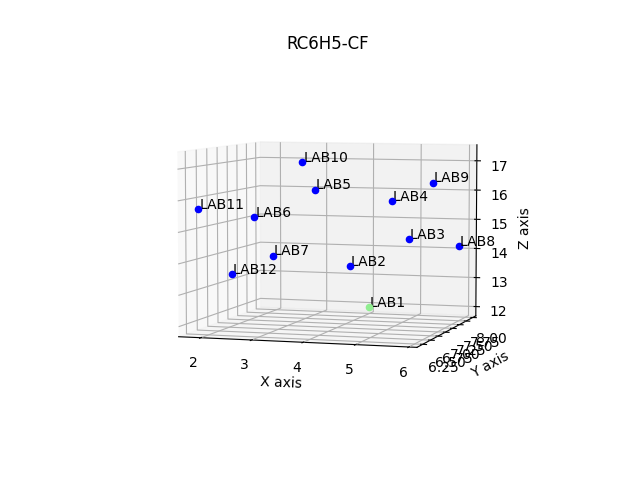

In [53]:
for central_group in central_groups:
    if central_group == "RC6H5" and contact_group == "RC6H5" or central_group == "RC6H5" and contact_group == "ArCH":
        continue

    plot_fragment_with_user_labels(central_group, "CF", definitions)